In [1]:
import os, sys, time, importlib
import osmnx

import geopandas as gpd
import pandas as pd
import networkx as nx
import numpy as np
sys.path.append(r"C:\Users\wb557957\Desktop\GOSTnets-master")
import GOSTnets as gn

# pip install osmium
import osmium, logging
import shapely.wkb as wkblib

from shapely.geometry import LineString, Point

import time
import psutil
import tracemalloc

In [2]:
tracemalloc.start()

In [3]:
# set file paths
pth = r"C:\Users\wb557957\Desktop\LKA"
inPth = r"C:\Users\wb557957\Desktop\LKA\lka_data"
outPth = r"C:\Users\wb557957\Desktop\LKA\lka_outputs"

In [4]:
G_time = nx.read_gpickle(os.path.join(pth, r'G_osmid_time.pickle'))
mb_edges = pd.read_csv('lka_traffic_allEdges.csv')

In [5]:
mb_edges.head()

,Unnamed: 0,stnode,endnode,length,Wkt,infra_type,osm_id,time,mode,geometry,FROM_NODE,TO_NODE,min_speed,max_speed,mean_speed,mode_speed,diffMeanMin
0,0,1650104033,6236632580,0.088233,"LINESTRING (80.5488946 5.9451973, 80.548912 5....",trunk,4860427,0.005294,drive,"LINESTRING (80.5488946 5.9451973, 80.548912 5....",1650104033,6236632580,23,37,26.793651,"ModeResult(mode=array([26], dtype=int64), coun...",3.793651
1,1,6236632580,6236632579,0.047336,"LINESTRING (80.548912 5.9451108, 80.5489254 5....",trunk,4860427,0.002840,drive,"LINESTRING (80.548912 5.9451108, 80.5489254 5....",6236632580,6236632579,23,37,26.793651,"ModeResult(mode=array([26], dtype=int64), coun...",3.793651
2,2,6236632579,6236632578,0.056870,"LINESTRING (80.5489254 5.9450654, 80.5489482 5...",trunk,4860427,0.003412,drive,"LINESTRING (80.5489254 5.9450654, 80.5489482 5...",6236632579,6236632578,23,37,26.793651,"ModeResult(mode=array([26], dtype=int64), coun...",3.793651
3,3,6236632575,6236632574,0.050106,"LINESTRING (80.5490246 5.94493, 80.5490642 5.9...",trunk,4860427,0.003006,drive,"LINESTRING (80.5490246 5.94493, 80.5490642 5.9...",6236632575,6236632574,6,35,21.702381,"ModeResult(mode=array([28], dtype=int64), coun...",15.702381
4,4,6236632574,6236632573,0.046789,"LINESTRING (80.5490642 5.9448993, 80.5491031 5...",trunk,4860427,0.002807,drive,"LINESTRING (80.5490642 5.9448993, 80.5491031 5...",6236632574,6236632573,6,35,21.702381,"ModeResult(mode=array([28], dtype=int64), coun...",15.702381


In [6]:
gn.example_edge(G_time)

(1650104033, 6236632580, {'osm_id': 4860427, 'Wkt': <shapely.geometry.linestring.LineString object at 0x00000215612D9048>, 'length': 0.0882327036884284, 'infra_type': 'trunk', 'time': 0.005293962221305703, 'mode': 'drive'})


In [7]:
# import geodataframes of graph edges and nodes and merge travel times
edges_gdf = pd.read_csv('sri_lanka_hwy_w_traffic1.csv')
nodes_gdf = pd.read_csv('G_osmid_nodes.csv')

In [8]:
edges_gdf.head()

,Unnamed: 0,stnode,endnode,length,infra_type,osm_id,time,mapbox_traffic_speed,geometry
0,0,1650104033,6236632580,0.088233,trunk,4860427,0.005294,26.0,"LINESTRING (80.5488946 5.9451973, 80.548912 5...."
1,1,1650104033,970058024,0.144698,trunk,152177791,0.008682,26.0,"LINESTRING (80.5488946 5.9451973, 80.5488725 5..."
2,2,6236632580,1650104033,0.088233,trunk,4860427,0.005294,26.0,"LINESTRING (80.548912 5.9451108, 80.5488946 5...."
3,3,6236632580,6236632579,0.047336,trunk,4860427,0.002840,26.0,"LINESTRING (80.548912 5.9451108, 80.5489254 5...."
4,4,6236632579,6236632580,0.047336,trunk,4860427,0.002840,26.0,"LINESTRING (80.5489254 5.9450654, 80.548912 5...."


In [11]:
edges_gdf.count()

Unnamed: 0              8634474
stnode                  8634474
endnode                 8634474
length                  8634474
infra_type              8634474
osm_id                  8634474
time                    8634474
mapbox_traffic_speed     533654
geometry                8634474
dtype: int64

In [ ]:
# map speeds to new speed column based on infra_type.
# try with a for loop
for edge in edge_gdf:
    if all_edges['MB_mean_speed'] != NaN:
        then all_edges['speedNom'] = all_edges['MB_mean_speed']
    elif all_edges['infra_type'] == 'trunk' or 'primary':
        all_edges['speedNom'] = 60
    elif all_edges['infra_type'] == 'secondary' or 'primary_link' or 'trunk_link':
        all_edges['speedNom'] = 50
    elif all_edges['infra_type'] == 'secondary_link':
        all_edges['speedNom'] = 45
    elif all_edges['infra_type'] == 'tertiary' or 'tertiary_link':
        all_edges['speedNom'] = 40
    elif all_edges['infra_type'] == 'residential':
        all_edges['speedNom'] = 30
    elif all_edges['infra_type'] == 'unclassified' or 'track':
        all_edges['speedNom'] = 25
    elif all_edges['infra_type'] == 'service':
        all_edges['speedNom'] = 20
    else all_edges['speedNom'] = NaN

In [ ]:
# or ... try using np.select to apply speeds to new column 
# 

next step: add new speed attributes to graph

play with walker's calculations of speed and travel time 

In [24]:
speed_wb = pd.read_csv('lka_traffic_1_10_variance_wb.csv')

In [26]:
speed_wb.head()

,v1,stnode,endnode,infra_type,length,osm_id,geometry,min_speed,max_speed,mean_speed,mode,mode_count,diffmeanmin,slowroad,range,rangedif
0,0,1650104033,6236632580,trunk,0.000088,4860427,"LINESTRING (80.5488946 5.9451973, 80.548912 5....",23,37,26.793652,26,1786,3.793651,1,14,3.690376
1,1,6236632580,6236632579,trunk,0.000047,4860427,"LINESTRING (80.548912 5.9451108, 80.5489254 5....",23,37,26.793652,26,1786,3.793651,1,14,3.690376
2,2,6236632579,6236632578,trunk,0.000057,4860427,"LINESTRING (80.5489254 5.9450654, 80.5489482 5...",23,37,26.793652,26,1786,3.793651,1,14,3.690376
3,58,35436481,2078304672,trunk,0.000167,5131121,"LINESTRING (80.6333162 7.2931692, 80.6331674 7...",5,15,6.029762,6,1976,1.029762,1,10,9.710982
4,62,2078304672,3810950074,trunk,0.000082,5131121,"LINESTRING (80.6331674 7.2930943, 80.633093 7....",6,10,7.983135,8,1939,1.983135,0,4,2.017008


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A39C34198>]],
      dtype=object)

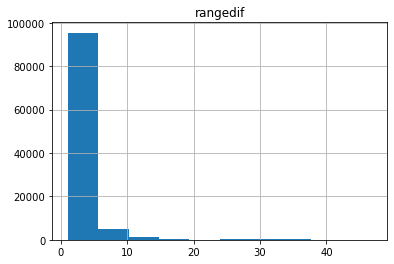

In [29]:
pd.DataFrame.hist(speed_wb, column='rangedif')

In [39]:
filter_rangedif = speed_wb[(speed_wb['rangedif'] >=0) & (speed_wb['rangedif']<=10)]
print(filter_rangedif.count())
filter_rangedif.head()

v1             100457
stnode         100457
endnode        100457
infra_type     100457
length         100457
osm_id         100457
geometry       100457
min_speed      100457
max_speed      100457
mean_speed     100457
mode           100457
mode_count     100457
diffmeanmin    100457
slowroad       100457
range          100457
rangedif       100457
dtype: int64


,v1,stnode,endnode,infra_type,length,osm_id,geometry,min_speed,max_speed,mean_speed,mode,mode_count,diffmeanmin,slowroad,range,rangedif
0,0,1650104033,6236632580,trunk,0.000088,4860427,"LINESTRING (80.5488946 5.9451973, 80.548912 5....",23,37,26.793652,26,1786,3.793651,1,14,3.690376
1,1,6236632580,6236632579,trunk,0.000047,4860427,"LINESTRING (80.548912 5.9451108, 80.5489254 5....",23,37,26.793652,26,1786,3.793651,1,14,3.690376
2,2,6236632579,6236632578,trunk,0.000057,4860427,"LINESTRING (80.5489254 5.9450654, 80.5489482 5...",23,37,26.793652,26,1786,3.793651,1,14,3.690376
3,58,35436481,2078304672,trunk,0.000167,5131121,"LINESTRING (80.6333162 7.2931692, 80.6331674 7...",5,15,6.029762,6,1976,1.029762,1,10,9.710982
4,62,2078304672,3810950074,trunk,0.000082,5131121,"LINESTRING (80.6331674 7.2930943, 80.633093 7....",6,10,7.983135,8,1939,1.983135,0,4,2.017008
